# Evaluation: forecast metrics

This notebook loads precomputed metrics for all nowcasts and persistence forecasts (control) and creates the following visualisations:
 - FSS score
 - calibration curves
 - ROC curves
 - ROC AUC over time of day

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

# Load precomputed metrics

In [ ]:
path_nc_stats = "./full-eval/metrics_nc/crop/metrics_nowcast_num_fc-3889.h5"
path_ps_stats = "./full-eval/metrics_ps/crop/metrics_persistence_num_fc-15995.h5"

In [3]:
metrics_nc = pd.read_hdf(path_nc_stats)

In [4]:
metrics_ps = pd.read_hdf(path_ps_stats)

In [6]:
metrics_nc

,Frame,t0,t_valid,fr,me_bt_r_mean,me_bt_g_mean,me_bt_b_mean,me_bt_mean,rmse_bt_r_mean,rmse_bt_g_mean,...,du_pfss,ct_fss,du_fss,ssim,ct_cm,du_cm,ct_BS,du_BS,ct_frac,du_frac
0,0,202401060000,202401060015,0,0.001403,-0.001721,-0.007300,-0.002539,0.447459,0.405718,...,"[0.8037940379403792, 0.9045434244183685, 0.962...","[0.8529564533830595, 0.9387467227316344, 0.972...","[0.7421160138191689, 0.8691560423584649, 0.943...",0.807731,"[[56592, 155], [328, 525]]","[[57372, 65], [57, 106]]",0.006432,0.001762,0.014809,0.002830
1,1,202401060000,202401060030,1,0.006210,0.002259,-0.093499,-0.028343,0.529834,0.512480,...,"[0.7940163331656154, 0.8920106187978004, 0.936...","[0.7875398949535921, 0.9010707146193171, 0.952...","[0.7203580698041651, 0.8476976332568109, 0.915...",0.737597,"[[56593, 163], [392, 452]]","[[57383, 62], [59, 96]]",0.007602,0.001707,0.014653,0.002691
2,2,202401060000,202401060045,2,0.032389,-0.010435,-0.149312,-0.042453,0.590440,0.600934,...,"[0.6995234065297762, 0.8230412198480509, 0.894...","[0.7380174298231459, 0.8699501231178223, 0.937...","[0.6238447324255645, 0.7742248414973, 0.869303...",0.680343,"[[56588, 205], [420, 387]]","[[57385, 89], [59, 67]]",0.008551,0.002116,0.014010,0.002188
3,3,202401060000,202401060100,3,0.031189,-0.019764,-0.136481,-0.041685,0.643145,0.680969,...,"[0.644622154523144, 0.7498862872285723, 0.8009...","[0.6950651036155395, 0.8371941221525301, 0.918...","[0.5721576618196067, 0.7039110999990925, 0.777...",0.630920,"[[56574, 209], [452, 365]]","[[57377, 103], [51, 69]]",0.009018,0.002238,0.014184,0.002083
4,4,202401060000,202401060115,4,0.034561,-0.015822,-0.232347,-0.071203,0.677410,0.746986,...,"[0.6041657394632602, 0.7130789733257779, 0.774...","[0.636579390261353, 0.7949305646972791, 0.8923...","[0.5308918202012172, 0.6645801229298294, 0.747...",0.593373,"[[56605, 224], [463, 308]]","[[57378, 106], [57, 59]]",0.009550,0.002336,0.013385,0.002014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90276,19,202405080200,202405080700,19,-0.350435,0.074497,1.940966,0.555009,1.272075,1.800039,...,"[0.29550408719346055, 0.3472822099272218, 0.38...","[0.4097373684099493, 0.4811938375582834, 0.579...","[0.27308987940042273, 0.3273774888107903, 0.37...",0.364887,"[[56028, 526], [721, 325]]","[[55694, 177], [1548, 181]]",0.016960,0.027051,0.018160,0.030017
90277,20,202405080200,202405080715,20,-0.361573,0.031194,1.650396,0.440006,1.284603,1.855206,...,"[0.3034027076378062, 0.3662354822725604, 0.424...","[0.40324778886166157, 0.47165328952606933, 0.5...","[0.2751921138471303, 0.33920783605107074, 0.39...",0.367171,"[[56102, 489], [687, 322]]","[[56273, 127], [1074, 126]]",0.016486,0.018908,0.017517,0.020833
90278,21,202405080200,202405080730,21,-0.369570,-0.018256,1.326689,0.312954,1.289697,1.918046,...,"[0.32313094681316, 0.40883062721878105, 0.4943...","[0.3811201594877254, 0.4454363291972073, 0.534...","[0.2837108637184665, 0.36578937241777354, 0.44...",0.370032,"[[56142, 456], [702, 300]]","[[56706, 111], [699, 84]]",0.016744,0.012577,0.017396,0.013594
90279,22,202405080200,202405080745,22,-0.393326,-0.045871,1.024259,0.195020,1.306846,1.992484,...,"[0.3578459320775822, 0.46231693578670663, 0.56...","[0.3550123926317175, 0.411254501793047, 0.4906...","[0.30632986570105747, 0.40307149594669694, 0.4...",0.370383,"[[56159, 438], [731, 272]]","[[56946, 78], [508, 68]]",0.017070,0.009290,0.017413,0.010000


In [7]:
metrics_ps

,Frame,idxs,t0,t_valid,fr,me_bt_r_mean,me_bt_g_mean,me_bt_b_mean,me_bt_mean,rmse_bt_r_mean,...,rmse_bt_mean,ct_fss,du_fss,ssim,ct_cm,du_cm,ct_BS,du_BS,ct_frac,du_frac
0,0,40,202401060000,202401060015,0,-0.005341,0.011818,0.025955,0.010811,0.598174,...,4.395299,"[0.6648986327204149, 0.8907318141980719, 0.969...","[0.7561436672967864, 0.8848107109879964, 0.954...",0.692267,"[[56210, 543], [496, 351]]","[[57384, 53], [63, 100]]",0.018038,0.002014,0.014705,0.002830
1,1,40,202401060000,202401060030,1,-0.009598,0.020325,0.049500,0.020065,0.718229,...,5.330111,"[0.5428081178628483, 0.7682806324110671, 0.922...","[0.675171736997056, 0.8230240549828178, 0.9157...",0.594094,"[[56167, 596], [539, 298]]","[[57375, 70], [72, 83]]",0.019705,0.002465,0.014531,0.002691
2,2,40,202401060000,202401060045,2,0.013535,0.017456,0.061401,0.030792,0.786578,...,5.809838,"[0.5111286312086846, 0.6950149758644136, 0.866...","[0.62954796030871, 0.7967319340752219, 0.89615...",0.542974,"[[56181, 619], [525, 275]]","[[57385, 89], [62, 64]]",0.019861,0.002622,0.013889,0.002188
3,3,40,202401060000,202401060100,3,0.005711,0.027985,0.059937,0.031204,0.840985,...,6.158168,"[0.48239957404011125, 0.6604653682585259, 0.83...","[0.5757575757575757, 0.733723482077542, 0.8375...",0.517059,"[[56157, 632], [549, 262]]","[[57385, 95], [62, 58]]",0.020503,0.002726,0.014080,0.002083
4,4,40,202401060000,202401060115,4,0.000685,0.036621,0.044403,0.027237,0.878080,...,6.404324,"[0.4329508893340618, 0.6281385450427583, 0.809...","[0.563719862227325, 0.7093162137951627, 0.7861...",0.496824,"[[56159, 675], [547, 219]]","[[57387, 97], [60, 56]]",0.021215,0.002726,0.013299,0.002014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372151,19,16535,202407311745,202407312245,19,-0.232178,0.549316,5.429688,1.915039,1.154339,...,10.244089,"[0.45912034176092853, 0.524334603720847, 0.618...","[0.4428180286436394, 0.4898361373672494, 0.561...",0.378003,"[[53233, 1764], [1523, 1080]]","[[55434, 607], [1032, 527]]",0.057066,0.028455,0.045191,0.027066
372152,20,16535,202407311745,202407312300,20,-0.234985,0.561035,5.539062,1.955078,1.163981,...,10.309554,"[0.46581957483543757, 0.5314410062372175, 0.62...","[0.4213456589106571, 0.4672550370556692, 0.538...",0.374312,"[[53257, 1752], [1499, 1092]]","[[55405, 630], [1061, 504]]",0.056441,0.029358,0.044983,0.027170
372153,21,16535,202407311745,202407312315,21,-0.237671,0.571289,5.640625,1.991211,1.171726,...,10.335794,"[0.4655467666965669, 0.5305707969841709, 0.623...","[0.4145148566920852, 0.4609632548042132, 0.530...",0.376284,"[[53291, 1762], [1465, 1082]]","[[55383, 642], [1083, 492]]",0.056024,0.029948,0.044219,0.027344
372154,22,16535,202407311745,202407312330,22,-0.244507,0.577637,5.726562,2.019531,1.177610,...,10.335063,"[0.45971459328162523, 0.5244048346724011, 0.61...","[0.40105416971088614, 0.4461717216234625, 0.51...",0.375292,"[[53327, 1793], [1429, 1051]]","[[55340, 653], [1126, 481]]",0.055938,0.030885,0.043056,0.027899


## Data Merging

Merge nowcast and persistence metrics datasets on common time indices for comparison analysis.

In [8]:
merged = pd.merge(left=metrics_nc, right=metrics_ps, how="inner", on=["t0", "t_valid", 'fr'], suffixes=('_nc', '_ps'))

In [9]:
merged

,Frame_nc,t0,t_valid,fr,me_bt_r_mean_nc,me_bt_g_mean_nc,me_bt_b_mean_nc,me_bt_mean_nc,rmse_bt_r_mean_nc,rmse_bt_g_mean_nc,...,rmse_bt_mean_ps,ct_fss_ps,du_fss_ps,ssim_ps,ct_cm_ps,du_cm_ps,ct_BS_ps,du_BS_ps,ct_frac_ps,du_frac_ps
0,0,202401060000,202401060015,0,0.001403,-0.001721,-0.007300,-0.002539,0.447459,0.405718,...,4.395299,"[0.6648986327204149, 0.8907318141980719, 0.969...","[0.7561436672967864, 0.8848107109879964, 0.954...",0.692267,"[[56210, 543], [496, 351]]","[[57384, 53], [63, 100]]",0.018038,0.002014,0.014705,0.002830
1,1,202401060000,202401060030,1,0.006210,0.002259,-0.093499,-0.028343,0.529834,0.512480,...,5.330111,"[0.5428081178628483, 0.7682806324110671, 0.922...","[0.675171736997056, 0.8230240549828178, 0.9157...",0.594094,"[[56167, 596], [539, 298]]","[[57375, 70], [72, 83]]",0.019705,0.002465,0.014531,0.002691
2,2,202401060000,202401060045,2,0.032389,-0.010435,-0.149312,-0.042453,0.590440,0.600934,...,5.809838,"[0.5111286312086846, 0.6950149758644136, 0.866...","[0.62954796030871, 0.7967319340752219, 0.89615...",0.542974,"[[56181, 619], [525, 275]]","[[57385, 89], [62, 64]]",0.019861,0.002622,0.013889,0.002188
3,3,202401060000,202401060100,3,0.031189,-0.019764,-0.136481,-0.041685,0.643145,0.680969,...,6.158168,"[0.48239957404011125, 0.6604653682585259, 0.83...","[0.5757575757575757, 0.733723482077542, 0.8375...",0.517059,"[[56157, 632], [549, 262]]","[[57385, 95], [62, 58]]",0.020503,0.002726,0.014080,0.002083
4,4,202401060000,202401060115,4,0.034561,-0.015822,-0.232347,-0.071203,0.677410,0.746986,...,6.404324,"[0.4329508893340618, 0.6281385450427583, 0.809...","[0.563719862227325, 0.7093162137951627, 0.7861...",0.496824,"[[56159, 675], [547, 219]]","[[57387, 97], [60, 56]]",0.021215,0.002726,0.013299,0.002014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90182,19,202405080200,202405080700,19,-0.350435,0.074497,1.940966,0.555009,1.272075,1.800039,...,9.737953,"[0.2695328648201736, 0.3119831645362048, 0.370...","[0.3407771454848537, 0.39305928518309763, 0.45...",0.289236,"[[54952, 1612], [699, 337]]","[[52683, 3188], [949, 780]]",0.040122,0.071823,0.017986,0.030017
90183,20,202405080200,202405080715,20,-0.361573,0.031194,1.650396,0.440006,1.284603,1.855206,...,10.090979,"[0.2531957250628667, 0.29045272242569986, 0.34...","[0.2683174281094448, 0.30836968815640653, 0.35...",0.285774,"[[54972, 1632], [679, 317]]","[[52981, 3419], [651, 549]]",0.040122,0.070660,0.017292,0.020833
90184,21,202405080200,202405080730,21,-0.369570,-0.018256,1.326689,0.312954,1.289697,1.918046,...,10.469285,"[0.25011707164784847, 0.2850404220267234, 0.33...","[0.1860537190082645, 0.21077392765251324, 0.23...",0.285094,"[[54969, 1632], [682, 317]]","[[53203, 3614], [429, 354]]",0.040174,0.070191,0.017344,0.013594
90185,22,202405080200,202405080745,22,-0.393326,-0.045871,1.024259,0.195020,1.306846,1.992484,...,10.883550,"[0.2430870176534916, 0.278194017879849, 0.3229...","[0.12548172159193227, 0.1406329451076297, 0.15...",0.282500,"[[54971, 1641], [680, 308]]","[[53283, 3741], [349, 227]]",0.040295,0.071007,0.017153,0.010000


## Time Processing and Data Cleaning

Extract hour and minute information from time strings and ensure FSS always contains valuis values or remove row if contains NaN.

In [10]:
def add_HH_MM(df, key):
    df[f'{key}_HH'] = np.int16(df[key].str[-4:-2])
    df[f'{key}_MM'] = np.int16(df[key].str[-2:])
    return df

In [11]:
merged = add_HH_MM(merged, 't0')
merged = add_HH_MM(merged, 't_valid')

In [12]:
def contains_nan(arr):
    if isinstance(arr, (np.ndarray, list)):
        return np.any(np.isnan(arr))
    return False

In [13]:
# List of columns to check
keys_chk_du = ['du_pfss', 'du_fss_ps']
keys_chk_ct = ['ct_pfss', 'ct_fss_ps']

# Apply the function to each of the specified columns and create a boolean mask
nan_mask_du = merged[keys_chk_du].apply(lambda row: any(contains_nan(row[col]) for col in keys_chk_du), axis=1)
nan_mask_ct = merged[keys_chk_ct].apply(lambda row: any(contains_nan(row[col]) for col in keys_chk_ct), axis=1)

# Filter the DataFrame to remove rows where any of the specified columns contain NaNs
merged_clean_du = merged[~(nan_mask_du)]
merged_clean_ct = merged[~(nan_mask_ct)]

In [14]:
print("Forecast initial times for dust FSS after cleaning:")
print(len(np.unique(merged_clean_du['t0'].values)))

print("Forecast initial times for convection FSS after cleaning:")
print(len(np.unique(merged_clean_ct['t0'].values)))

Forecast initial times for dust FSS after cleaning:
3817
Forecast initial times for convection FSS after cleaning:
3817


Only analyse timestamps where dust or convection are more than 1% of pixels

In [15]:
def remove_rows_lt(df, key, value):
    mask = df[key] < value
    print(f'Removed {np.sum(mask)} rows with {key} < {value}.')
    return df[~mask]

In [16]:
min_du_frac = 0.01
min_ct_frac = 0.01

print(f"Number of rows with du_frac_ps > {min_du_frac}:"), print(np.sum(merged_clean_du['du_frac_ps'] > min_du_frac))
print(f"Number of rows with ct_frac_nc > {min_ct_frac}:"), print(np.sum(merged_clean_ct['du_frac_nc'] > min_ct_frac))

Number of rows with du_frac_ps > 0.01:
52468
Number of rows with ct_frac_nc > 0.01:
52468


(None, None)

In [17]:
merged_clean_du = merged_clean_du[merged_clean_du['du_frac_ps'] > min_du_frac]
merged_clean_ct = merged_clean_ct[merged_clean_ct['ct_frac_ps'] > min_ct_frac]

# Plotting section

Set output directory.

In [18]:
odir = './plt'

## Fractions Skill Score (FSS)

Fraction Skill Score (FSS) for convection and dust across different spatial scales and forecast lead times. Solid lines show nowcast performance, dashed lines show persistence baseline.

In [19]:
ct_pfss = merged_clean_ct.groupby('fr')['ct_pfss'].mean()
du_pfss = merged_clean_du.groupby('fr')['du_pfss'].mean()
ct_fss_ps = merged_clean_ct.groupby('fr')['ct_fss_ps'].mean()
du_fss_ps = merged_clean_du.groupby('fr')['du_fss_ps'].mean()

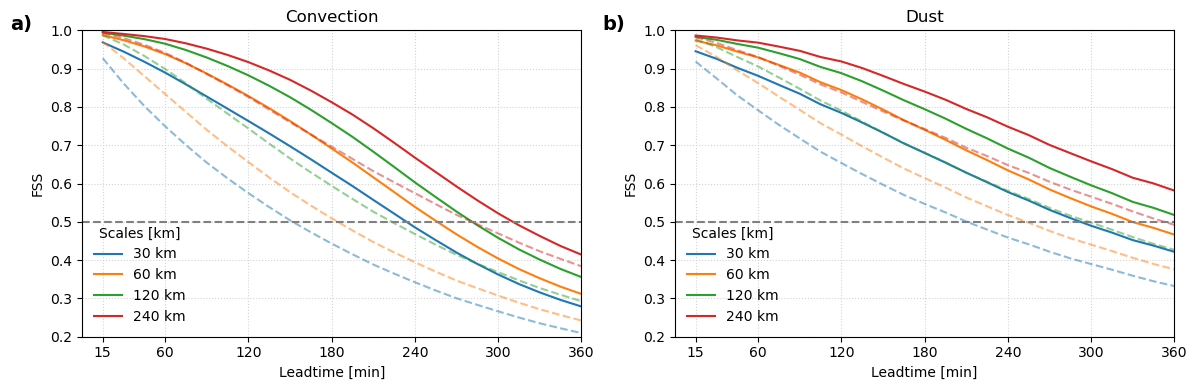

In [20]:
nfr = 24
fss_scales = [2,4,8,16]  # in pixels
pixel_size_km = 15  # average pixel size for conversion of pixel scale to km

frames = range(nfr)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

# Left panel: Convection
for ii, scale in enumerate(fss_scales):
    nc_fss_scale = ct_pfss.apply(lambda x: x[ii]) 
    ps_fss_scale = ct_fss_ps.apply(lambda x: x[ii]) 
    axes[0].plot(frames, nc_fss_scale, color=plt.cm.tab10(ii), linestyle='solid', alpha=1.0, label=f'{scale*pixel_size_km} km')
    axes[0].plot(frames, ps_fss_scale, color=plt.cm.tab10(ii), linestyle='dashed', alpha=0.5)

axes[0].set_title("Convection")
axes[0].set_xlabel("Leadtime [min]")
axes[0].set_ylabel("FSS")
axes[0].grid(True, color='lightgrey', linestyle=':')
axes[0].legend(framealpha=0, edgecolor='none', loc='lower left', title='Scales [km]')
axes[0].text(-0.1, 1.05, 'a)', transform=axes[0].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
axes[0].axhline(y=0.5, color='grey', linestyle='--')


# Right panel: Dust
for ii, scale in enumerate(fss_scales):
    nc_fss_scale = du_pfss.apply(lambda x: x[ii]) 
    ps_fss_scale = du_fss_ps.apply(lambda x: x[ii]) 
    axes[1].plot(frames, nc_fss_scale, color=plt.cm.tab10(ii), linestyle='solid', alpha=1.0, label=f'{scale*pixel_size_km} km')
    axes[1].plot(frames, ps_fss_scale, color=plt.cm.tab10(ii), linestyle='dashed', alpha=0.5)

axes[1].set_title("Dust")
axes[1].set_xlabel("Leadtime [min]")
axes[1].set_ylabel("FSS")
axes[1].grid(True, color='lightgrey', linestyle=':')
axes[1].legend(framealpha=0, edgecolor='none', loc='lower left', title='Scales [km]')
axes[1].text(-0.1, 1.05, 'b)', transform=axes[1].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
axes[1].axhline(y=0.5, color='grey', linestyle='--')

ticks = [i for i in range(24) if (i * 15+30) % 60 == 15 or i == 0]
tick_labels = [(i * 15 + 15) for i in ticks]

for ax in axes:
    ax.set_xticks(ticks)
    ax.set_xticklabels([str(label) for label in tick_labels])

    ax.set_xlim((-1,nfr-1))
    ax.set_ylim((0.2,1))
 

plt.tight_layout()
plt.savefig(os.path.join(odir, 'fss_panelplot_all_scales.png'), dpi=600, bbox_inches='tight')
plt.savefig(os.path.join(odir, 'fss_panelplot_all_scales.pdf'), bbox_inches='tight')
plt.show()

# Calibration curves

In [21]:
def interpolate_cal(df, pf_col, pt_col, n_steps=6):
    def interpolate_cal_stats(row):
        pf = row[pf_col]
        pt = row[pt_col]
        pt_stp = np.linspace(0, 1, n_steps)
        pf_interp = np.interp(pt_stp, pt, pf)
        idx_na = pt_stp > np.nanmax(pt)
        pt_stp[idx_na] = np.nan
        pf_interp[idx_na] = np.nan
        return pd.Series({f'{pf_col}_ip': pf_interp, f'{pt_col}_ip': pt_stp})  # Add suffix '_ip'

    # Apply the function and add the results as new columns
    interpolated = df.apply(interpolate_cal_stats, axis=1)
    df[f'{pf_col}_ip'] = interpolated[f'{pf_col}_ip']
    df[f'{pt_col}_ip'] = interpolated[f'{pt_col}_ip']
    return df

In [22]:
merged = interpolate_cal(merged, 'ct_pf', 'ct_pt')
merged = interpolate_cal(merged, 'du_pf', 'du_pt')

In [23]:
ct_pf = merged.groupby('fr')['ct_pf_ip'].apply(lambda x: np.nanmean(np.stack(x.values), axis=0)).values
ct_pt = merged.groupby('fr')['ct_pt_ip'].apply(lambda x: np.nanmean(np.stack(x.values), axis=0)).values
du_pf = merged.groupby('fr')['du_pf_ip'].apply(lambda x: np.nanmean(np.stack(x.values), axis=0)).values
du_pt = merged.groupby('fr')['du_pt_ip'].apply(lambda x: np.nanmean(np.stack(x.values), axis=0)).values

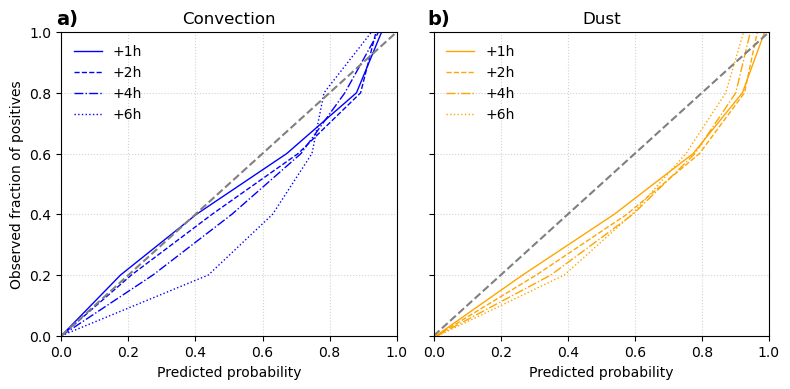

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)  # 1 row, 2 columns

# Line styles and labels for the time steps
ls = ['-', '--', '-.', ':']
labels = ['+1h', '+2h', '+4h', '+6h']


num_bins = len(metrics_nc['ct_hist'][0])
xax_bin = np.linspace(0, 1, num_bins)


# Plot convection (ct) on the left panel
for ii, tt in enumerate([3, 7, 15, 23]):
    ct_cal_pt = ct_pt[tt]
    ct_cal_pf = ct_pf[tt]
    axes[0].plot(ct_cal_pf, ct_cal_pt, ls=ls[ii], lw=1, label=labels[ii], color='blue')
    
axes[0].plot([0, 1], [0, 1], linestyle='--', color='grey')
axes[0].set_title('Convection')
axes[0].text(0.05, 1.075, 'a)', transform=axes[0].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')


# Plot dust (du) on the right panel
for ii, tt in enumerate([3, 7, 15, 23]):
    du_cal_pt = du_pt[tt]
    du_cal_pf = du_pf[tt]
    axes[1].plot(du_cal_pf, du_cal_pt, ls=ls[ii], lw=1, label=labels[ii], color='orange')

axes[1].plot([0, 1], [0, 1], linestyle='--', color='grey')
axes[1].set_title('Dust')
axes[1].text(0.05, 1.075, 'b)', transform=axes[1].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')

axes[0].set_ylabel('Observed fraction of positives')
for ax in axes:
    ax.set_xlabel('Predicted probability')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.grid(True, color='lightgrey', linestyle=':')
    ax.legend(framealpha=0, edgecolor='none', loc='upper left')


plt.tight_layout()
plt.savefig(os.path.join(odir, 'calibration.png'), dpi=600, bbox_inches='tight')
plt.savefig(os.path.join(odir, 'calibration.pdf'), bbox_inches='tight')
plt.show()

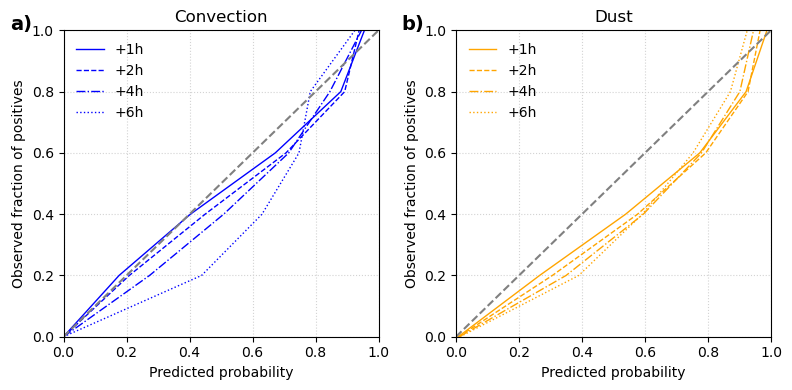

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=False)  # 1 row, 2 columns

# Line styles and labels for the time steps
ls = ['-', '--', '-.', ':']
labels = ['+1h', '+2h', '+4h', '+6h']


num_bins = len(metrics_nc['ct_hist'][0])
xax_bin = np.linspace(0, 1, num_bins)

# Plot convection (ct) on the left panel
for ii, tt in enumerate([3, 7, 15, 23]):
    ct_cal_pt = ct_pt[tt]
    ct_cal_pf = ct_pf[tt]
    axes[0].plot(ct_cal_pf, ct_cal_pt, ls=ls[ii], lw=1, label=labels[ii], color='blue')
    
axes[0].plot([0, 1], [0, 1], linestyle='--', color='grey')
axes[0].text(-0.1, 1.05, 'a)', transform=axes[0].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
axes[0].set_title('Convection')
axes[0].set_ylabel('Observed fraction of positives')


# Plot dust (du) on the right panel
for ii, tt in enumerate([3, 7, 15, 23]):
    du_cal_pt = du_pt[tt]
    du_cal_pf = du_pf[tt]
    axes[1].plot(du_cal_pf, du_cal_pt, ls=ls[ii], lw=1, label=labels[ii], color='orange')

axes[1].plot([0, 1], [0, 1], linestyle='--', color='grey')
axes[1].text(-0.1, 1.05, 'b)', transform=axes[1].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
axes[1].set_title('Dust')
axes[1].set_ylabel('Observed fraction of positives')

for ax in axes:
    ax.set_xlabel('Predicted probability')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.grid(True, color='lightgrey', linestyle=':')
    ax.legend(framealpha=0, edgecolor='none', loc='upper left')


plt.tight_layout()
plt.savefig(os.path.join(odir, 'calibration.png'), dpi=600, bbox_inches='tight')
plt.savefig(os.path.join(odir, 'calibration.pdf'), bbox_inches='tight')
plt.show()

## ROC curves preparation

Prepare data for ROC (Receiver Operating Characteristic) analysis by removing rows with missing values and applying minimum threshold filters for dust and convection coverage.

In [26]:
def remove_nan_rows(df, keys:list):
    mask = df[keys].apply(lambda row: any(contains_nan(row[col]) for col in keys), axis=1)
    print(f'Removed {np.sum(mask)} rows with NaN values.')
    return df[~mask]

In [27]:
du_roc = remove_nan_rows(merged, keys=['du_roc_tpr', 'du_roc_fpr'])
ct_roc = remove_nan_rows(merged, keys=['ct_roc_tpr', 'ct_roc_fpr'])

Removed 1346 rows with NaN values.
Removed 30 rows with NaN values.


In [28]:
du_roc = remove_rows_lt(du_roc, 'du_frac_ps', 0.01)
ct_roc = remove_rows_lt(ct_roc, 'ct_frac_ps', 0.01)

Removed 36345 rows with du_frac_ps < 0.01.
Removed 21086 rows with ct_frac_ps < 0.01.


In [29]:
def interpolate_roc(df, tpr_col, fpr_col, n_steps=100):
    def interpolate_roc_stats(row):
        tpr = row[tpr_col]
        fpr = row[fpr_col]
        fpr_stp = np.linspace(0, 1, n_steps)
        tpr_ip = np.interp(fpr_stp, fpr, tpr)
        return pd.Series({f'{tpr_col}_ip': tpr_ip, f'{fpr_col}_ip': fpr_stp})

    interpolated = df.apply(interpolate_roc_stats, axis=1)
    df[f'{tpr_col}_ip'] = interpolated[f'{tpr_col}_ip']
    df[f'{fpr_col}_ip'] = interpolated[f'{fpr_col}_ip']
    return df

In [30]:
du_roc = interpolate_roc(df=du_roc, tpr_col='du_roc_tpr', fpr_col='du_roc_fpr')
ct_roc = interpolate_roc(df=ct_roc, tpr_col='ct_roc_tpr', fpr_col='ct_roc_fpr')

Interpolate ROC curves to common false positive rate grid and calculate mean True Positive Rate, False Positive Rate, and AUC scores across forecast lead times.

In [31]:
du_tpr = du_roc.groupby('fr')['du_roc_tpr_ip'].mean()
du_fpr = du_roc.groupby('fr')['du_roc_fpr_ip'].mean()
du_auc = du_roc.groupby('fr')['du_auc'].mean()

ct_tpr = ct_roc.groupby('fr')['ct_roc_tpr_ip'].mean()
ct_fpr = ct_roc.groupby('fr')['ct_roc_fpr_ip'].mean()
ct_auc = ct_roc.groupby('fr')['ct_auc'].mean()

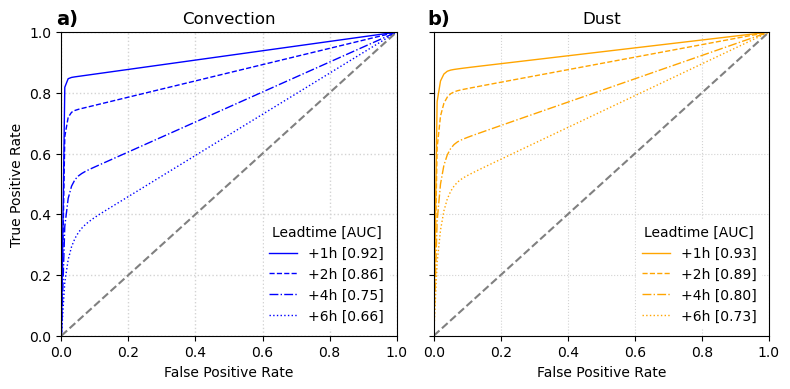

In [32]:
# Define line styles and labels
ls = ['-', '--', '-.', ':']
labels = ['+1h', '+2h', '+4h', '+6h']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Left plot: Convection
axes[0].set_title("Convection")
for ii, fr in enumerate([3, 7, 15, 23]):
    axes[0].plot(ct_fpr[fr], ct_tpr[fr], lw=1, label=f'{labels[ii]} [{ct_auc[fr]:0.2f}]', color='blue', linestyle=ls[ii])
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.0])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(framealpha=1, edgecolor='none', loc='lower right', title='Leadtime [AUC]')
axes[0].grid(True, color='lightgrey', linestyle=':', lw=1)
axes[0].text(0.05, 1.075, 'a)', transform=axes[0].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')

# Right plot: Dust
axes[1].set_title("Dust")
for ii, fr in enumerate([3, 7, 15, 23]):
    axes[1].plot(du_fpr[fr], du_tpr[fr], lw=1, label=f'{labels[ii]} [{du_auc[fr]:0.2f}]', color='orange', linestyle=ls[ii])
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.0])
axes[1].set_xlabel('False Positive Rate')
axes[1].legend(framealpha=1, edgecolor='none', loc='lower right', title='Leadtime [AUC]')
axes[1].grid(True, color='lightgrey', linestyle=':')
axes[1].text(0.05, 1.075, 'b)', transform=axes[1].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')


plt.tight_layout()
plt.savefig(os.path.join(odir, 'roc_curves.png'), dpi=600, bbox_inches='tight')
plt.savefig(os.path.join(odir, 'roc_curves.pdf'), bbox_inches='tight')
plt.show()

## ROC AUC over time of day (UTC hours)

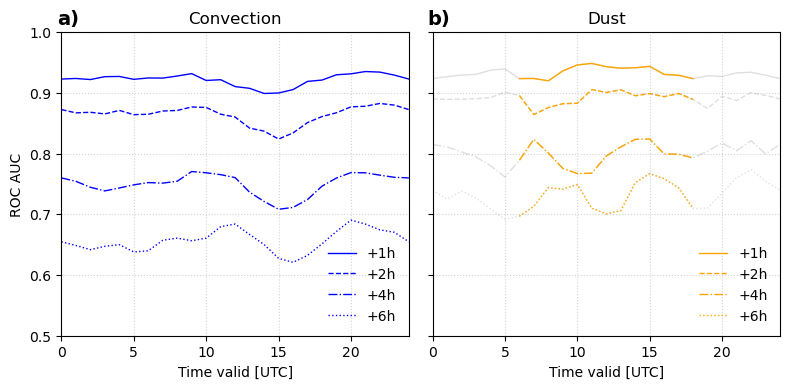

In [33]:
# Define line styles and labels
ls = ['-', '--', '-.', ':']
labels = ['+1h', '+2h', '+4h', '+6h']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

# Left plot: Convection
axes[0].set_title("Convection")
for ii, fr in enumerate([3, 7, 15, 23]):
    ct_auc_HH = ct_roc[ct_roc['fr'] == fr].groupby('t_valid_HH')['ct_auc'].mean()
    ct_auc_HH = pd.concat([ct_auc_HH, pd.Series([ct_auc_HH.iloc[0]])], ignore_index=True)
    axes[0].plot(range(0, 25), ct_auc_HH, ls=ls[ii], lw=1, color='blue', label=labels[ii])
axes[0].set_xlabel('Time valid [UTC]')
axes[0].set_ylabel('ROC AUC')
axes[0].legend(framealpha=0, edgecolor='none', loc='lower right', title=' ')
axes[0].grid(True, color='lightgrey', linestyle=':')
axes[0].set_xlim(0, 24)
axes[0].set_ylim(0.5, 1)
axes[0].text(0.05, 1.075, 'a)', transform=axes[0].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')

# Right plot: Dust
axes[1].set_title("Dust")
for ii, fr in enumerate([3, 7, 15, 23]):
    du_auc_HH = du_roc[du_roc['fr'] == fr].groupby('t_valid_HH')['du_auc'].mean()
    du_auc_HH = pd.concat([du_auc_HH, pd.Series([du_auc_HH.iloc[0]])], ignore_index=True)
    axes[1].plot(range(0,25), du_auc_HH, lw=1, ls=ls[ii], color='grey', alpha=0.25)
    axes[1].plot(range(6,19), du_auc_HH[6:19], lw=1, ls=ls[ii], color='orange', label=labels[ii])

axes[1].set_xlabel('Time valid [UTC]')
axes[1].legend(framealpha=0, edgecolor='none', loc='lower right', title=' ')
axes[1].grid(True, color='lightgrey', linestyle=':')
axes[1].set_xlim(0, 24)
axes[1].set_ylim(0.5, 1)
axes[1].text(0.05, 1.075, 'b)', transform=axes[1].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')


plt.tight_layout()
plt.savefig(os.path.join(odir, 'roc_auc_over_HH.png'), dpi=600, bbox_inches='tight')
plt.savefig(os.path.join(odir, 'roc_auc_over_HH.pdf'), bbox_inches='tight')
plt.show()

End of this notebook.